# Bombcell Post-Run Analysis (Open Ephys + Kilosort4)

Assumes Bombcell has already been run and you exported per-probe CSV/JSON summaries.

**Expected folder convention**
- `{NP_recording_name}/bombcell_DEFAULT/`
  - `DUPLICATED_KILOSORT4_FILES/`
  - `batch_DEFAULT_results/`
- `{NP_recording_name}/bombcell_NP2.0/`
  - `DUPLICATED_KILOSORT4_FILES_ACD/`
  - `NP2_ReRun_results/`

In [1]:
NP_recording_name = 'Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00'

In [2]:
# New Code
from pathlib import Path

RECORDING_ROOT = Path(r"H:\Grant\Neuropixels\Kilosort_Recordings") / NP_recording_name

BOMBCELL_DEFAULT_ROOT = RECORDING_ROOT / 'bombcell' / "bombcell_DEFAULT"
BOMBCELL_NP20_ROOT = RECORDING_ROOT / 'bombcell'  / "bombcell_NP2.0"
BOMBCELL_SINGLEPROBE_ROOT = RECORDING_ROOT / "bombcell" / "bombcell_single_probe"


DEFAULT_KS_STAGING_ROOT = BOMBCELL_DEFAULT_ROOT 
NP20_KS_STAGING_ROOT = BOMBCELL_NP20_ROOT 
BOMBCELL_KS_SINGLEPROBE_STAGING_ROOT = BOMBCELL_SINGLEPROBE_ROOT 

DEFAULT_EXPORT_ROOT = BOMBCELL_DEFAULT_ROOT / "batch_DEFAULT_results"
NP20_EXPORT_ROOT = BOMBCELL_NP20_ROOT / "NP2_ReRun_results"
SINGLE_EXPORT_ROOT = BOMBCELL_SINGLEPROBE_ROOT / "single_probe_results"

# Make sure they exist
for p in [
    DEFAULT_KS_STAGING_ROOT,
    NP20_KS_STAGING_ROOT,
    BOMBCELL_KS_SINGLEPROBE_STAGING_ROOT,
    DEFAULT_EXPORT_ROOT,
    NP20_EXPORT_ROOT,
    SINGLE_EXPORT_ROOT

]:
    p.mkdir(parents=True, exist_ok=True)
    print(p)


H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_DEFAULT
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_NP2.0
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_DEFAULT\batch_DEFAULT_results
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_NP2.0\NP2_ReRun_results
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\single_probe_results


In [3]:
probeA_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeA'
probeB_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeB-AP'
probeC_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeC'
probeD_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeD'
probeE_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeE-AP'
probeF_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeF-AP'

structur_oebin = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\structure.oebin'

probeA_continousDir = probeA_Dir + r'\continuous.dat'
probeB_continousDir = probeB_Dir + r'\continuous.dat'
probeC_continousDir = probeC_Dir + r'\continuous.dat'
probeD_continousDir = probeD_Dir + r'\continuous.dat'
probeE_continousDir = probeE_Dir + r'\continuous.dat'
probeF_continousDir = probeF_Dir + r'\continuous.dat'

continousDir = [probeA_continousDir,probeB_continousDir,probeC_continousDir,probeD_continousDir,probeE_continousDir,probeF_continousDir]
probeLetters = ['A','B','C','D','E','F']

In [4]:
# =========================
# Configure
# =========================
from pathlib import Path
import pandas as pd
import numpy as np
import json

PROBES_ALL  = ["A","B","C","D","E","F"]
PROBES_NP20 = ["A","C","D"]

print("RECORDING_ROOT:", RECORDING_ROOT)
print("DEFAULT_EXPORT_ROOT exists:", DEFAULT_EXPORT_ROOT.exists())
print(DEFAULT_EXPORT_ROOT)
print("NP20_EXPORT_ROOT exists:", NP20_EXPORT_ROOT.exists())
print(NP20_EXPORT_ROOT)
print("SINGLE_EXPORT_ROOT exists:", SINGLE_EXPORT_ROOT.exists())
print(SINGLE_EXPORT_ROOT)

RECORDING_ROOT: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00
DEFAULT_EXPORT_ROOT exists: True
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_DEFAULT\batch_DEFAULT_results
NP20_EXPORT_ROOT exists: True
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_NP2.0\NP2_ReRun_results
SINGLE_EXPORT_ROOT exists: True
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\single_probe_results


In [5]:
# =========================
# Helpers
# =========================
def load_probe_exports(export_root: Path, probe: str):
    # Loads Probe_{probe} exports: quality_metrics.csv, unit_type_counts.csv, param.json, checks.json.
    probe_dir = export_root / f"Probe_{probe}"
    qm_path = probe_dir / f"Probe_{probe}_quality_metrics.csv"
    counts_path = probe_dir / f"Probe_{probe}_unit_type_counts.csv"
    param_path = probe_dir / f"Probe_{probe}_param.json"
    checks_path = probe_dir / f"Probe_{probe}_checks.json"
    err_path = probe_dir / "ERROR.txt"

    if err_path.exists():
        return {"probe": probe, "status": "FAILED", "error": err_path.read_text(), "probe_dir": probe_dir}

    out = {"probe": probe, "status": "OK", "probe_dir": probe_dir}
    out["qm"] = pd.read_csv(qm_path) if qm_path.exists() else None
    out["counts"] = pd.read_csv(counts_path) if counts_path.exists() else None
    out["param"] = json.loads(param_path.read_text()) if param_path.exists() else {}
    out["checks"] = json.loads(checks_path.read_text()) if checks_path.exists() else {}

    out["cluster_id_col"] = None

    out["ks_dir"] = out["checks"].get("ks_dir", None)
    out["save_path"] = out["checks"].get("save_path", None)
    
    if out["qm"] is not None:
        for c in ["cluster_id","clusterID","cluster_id_ks","cluster_id_phy","cluster"]:
            if c in out["qm"].columns:
                out["cluster_id_col"] = c
                break

    return out

def load_batch_summary(export_root: Path):
    p = export_root / "batch_summary.csv"
    return pd.read_csv(p) if p.exists() else None

def summarize_unit_types(qm: pd.DataFrame, label_col="Bombcell_unit_type"):
    if qm is None or label_col not in qm.columns:
        return None
    return qm[label_col].value_counts().rename_axis("unit_type").reset_index(name="count")

def add_percentages(df_counts: pd.DataFrame):
    if df_counts is None or df_counts.empty:
        return df_counts
    total = df_counts["count"].sum()
    df_counts = df_counts.copy()
    df_counts["pct"] = 100 * df_counts["count"] / total
    return df_counts

def find_cluster_row(qm: pd.DataFrame, cluster_id: int, cluster_id_col: str):
    if qm is None:
        raise ValueError("qm is None")
    if cluster_id_col is None or cluster_id_col not in qm.columns:
        raise ValueError("No cluster_id column found in quality_metrics.csv")
    sub = qm.loc[qm[cluster_id_col] == cluster_id]
    if sub.empty:
        raise KeyError(f"Cluster id {cluster_id} not found in {cluster_id_col}")
    return sub.iloc[0]

def threshold_fail_report(row, qm_cols, param):
    # Common Bombcell gates; only checks metrics that exist in the CSV.
    rules = [
        ("rawAmplitude", "<", param.get("minAmplitude", 40)),
        ("signalToNoiseRatio", "<", param.get("minSNR", 5)),
        ("presenceRatio", "<", param.get("minPresenceRatio", 0.7)),
        ("fractionRPVs_estimatedTauR", ">", param.get("maxRPVviolations", 0.1)),
        ("percentageSpikesMissing_gaussian", ">", param.get("maxPercSpikesMissing", 20)),
        ("waveformDuration_peakTrough", "<", param.get("minWvDuration", 100)),
        ("waveformDuration_peakTrough", ">", param.get("maxWvDuration", 1150)),
        ("nPeaks", ">", param.get("maxNPeaks", 2)),
        ("nTroughs", ">", param.get("maxNTroughs", 1)),
        ("waveformBaselineFlatness", ">", param.get("maxWvBaselineFraction", 0.3)),
    ]
    fails = []
    for col, op, thr in rules:
        if col not in qm_cols:
            continue
        v = row[col]
        if pd.isna(v):
            continue
        if (op == "<" and v < thr) or (op == ">" and v > thr):
            fails.append((col, float(v), op, float(thr)))
    return fails

# ===================================================================
# SINGLE UNIT SELECTION
# ===================================================================

In [6]:
probe = "B"      
cluster_id = 361  # AKA. unitID from kilosort    

run = "SINGLE"      # "DEFAULT" or "NP20" or 'SINGLE'
BC_SESSION = BOMBCELL_SINGLEPROBE_ROOT # BOMBCELL_DEFAULT_ROOT or BOMBCELL_NP20_ROOT or BOMBCELL_SINGLEPROBE_ROOT

# BOMBCELL_DEFAULT_ROOT = RECORDING_ROOT / 'bombcell' / "bombcell_DEFAULT"
# BOMBCELL_NP20_ROOT = RECORDING_ROOT / 'bombcell'  / "bombcell_NP2.0"
# BOMBCELL_SINGLEPROBE_ROOT = RECORDING_ROOT / "bombcell" / "bombcell_single_probe"


In [7]:
from pathlib import Path
import pandas as pd

ks_dir = Path(fr"{BC_SESSION}\kilosort4_{probe}")

if ks_dir.exists():
    print(f'Found BC session for probe {probe}')
    print(ks_dir)
else:
    print('No Dir Found')

label_tsv = ks_dir / "cluster_bc_unitType.tsv"
df = pd.read_csv(label_tsv, sep="\t")

# Column is usually 'cluster_id' or 'id'
print(df.columns)

# Try both common names:
if "cluster_id" in df.columns:
    print('cluster_id Found')
    print(df.loc[df["cluster_id"] == cluster_id])
elif "id" in df.columns:
    print(df.loc[df["id"] == cluster_id])
else:
    raise ValueError("Unexpected columns; print(df.head()) and inspect.")


Found BC session for probe B
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_B
Index(['cluster_id', 'bc_unitType'], dtype='str')
cluster_id Found
     cluster_id bc_unitType
359         361       NOISE


# ==============================================================
# RAW TRACES
# ==============================================================


### open raw trace around spikes for cluster

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

def load_ks4_sorting(folder):
    st = np.load(os.path.join(folder, "spike_times.npy")).astype(np.int64)      # samples
    sc = np.load(os.path.join(folder, "spike_clusters.npy")).astype(np.int64)   # cluster ids
    return st, sc

def get_cluster_spike_times(spike_times, spike_clusters, cluster_id):
    t = spike_times[spike_clusters == int(cluster_id)]
    t.sort()
    return t

def open_memmap_binary(bin_path, n_channels, dtype=np.int16):
    mm = np.memmap(bin_path, dtype=dtype, mode="r")
    n_samp = mm.size // n_channels
    if n_samp * n_channels != mm.size:
        raise ValueError(f"Binary size {mm.size} not divisible by n_channels={n_channels}")
    return mm.reshape(n_samp, n_channels), n_samp

def extract_snippet(mm_2d, center_sample, pre_samp, post_samp, chans):
    start = int(center_sample) - pre_samp
    stop  = int(center_sample) + post_samp
    if start < 0 or stop >= mm_2d.shape[0]:
        return None, None
    snip = mm_2d[start:stop, :][:, chans]
    return snip, start

def plot_raw_snippets_for_cluster(
    ks_folder,
    bin_path,
    cluster_id,
    n_channels,
    fs=30000,
    peak_chan=72,
    neighbor_radius=4,
    n_spikes_to_plot=30,
    pre_ms=2.0,
    post_ms=3.0,
    dtype=np.int16,
    seed=0,
    gain_uV_per_bit=None,   # set if you know it, else leave None
    ignore_edges_s=1.0
):
    spike_times, spike_clusters = load_ks4_sorting(ks_folder)
    t = get_cluster_spike_times(spike_times, spike_clusters, cluster_id)
    if t.size == 0:
        raise ValueError(f"No spikes found for cluster_id={cluster_id}")

    mm, n_samp = open_memmap_binary(bin_path, n_channels, dtype=dtype)

    pre_samp  = int(round(pre_ms  * 1e-3 * fs))
    post_samp = int(round(post_ms * 1e-3 * fs))
    win = pre_samp + post_samp

    # channels to show
    peak_chan = int(peak_chan)
    chans = np.arange(max(0, peak_chan - neighbor_radius), min(n_channels, peak_chan + neighbor_radius + 1))
    if peak_chan not in chans:
        chans = np.sort(np.unique(np.append(chans, peak_chan)))

    # avoid edges
    edge = int(ignore_edges_s * fs)
    valid = t[(t > edge + pre_samp) & (t < (n_samp - edge - post_samp - 1))]
    if valid.size == 0:
        raise ValueError("No spikes remain after edge exclusion; reduce ignore_edges_s or window size.")

    rng = np.random.default_rng(seed)
    pick = valid if valid.size <= n_spikes_to_plot else rng.choice(valid, size=n_spikes_to_plot, replace=False)
    pick.sort()

    # collect snippets
    snippets = []
    for s in pick:
        snip, start = extract_snippet(mm, s, pre_samp, post_samp, chans)
        if snip is None:
            continue
        snippets.append(snip)

    if len(snippets) == 0:
        raise RuntimeError("Failed to extract any snippets (likely edge/window issue).")

    X = np.stack(snippets, axis=0)  # (n_spikes, win, n_chans)

    if gain_uV_per_bit is not None:
        X = X.astype(np.float32) * float(gain_uV_per_bit)

    t_ms = (np.arange(win) - pre_samp) * 1e3 / fs

    # 1) Overlay plot per channel (all chosen spikes)
    fig, axes = plt.subplots(len(chans), 1, figsize=(10, 1.6 * len(chans)), sharex=True)
    if len(chans) == 1:
        axes = [axes]
    for i, ch in enumerate(chans):
        axes[i].plot(t_ms, X[:, :, i].T, linewidth=0.5, alpha=0.25)
        axes[i].axvline(0, linewidth=1)
        axes[i].set_ylabel(f"ch {ch}")
    axes[-1].set_xlabel("time (ms)")
    fig.suptitle(f"Raw trace snippets around spikes: cluster {cluster_id} (n={X.shape[0]})")
    plt.tight_layout()
    plt.show()

    # 2) Mean waveform across snippets (per channel)
    m = X.mean(axis=0)  # (win, n_chans)
    fig, axes = plt.subplots(len(chans), 1, figsize=(10, 1.4 * len(chans)), sharex=True)
    if len(chans) == 1:
        axes = [axes]
    for i, ch in enumerate(chans):
        axes[i].plot(t_ms, m[:, i], linewidth=1.5)
        axes[i].axvline(0, linewidth=1)
        axes[i].set_ylabel(f"ch {ch}")
    axes[-1].set_xlabel("time (ms)")
    fig.suptitle(f"Mean raw waveform: cluster {cluster_id}")
    plt.tight_layout()
    plt.show()

    return {
        "cluster_id": int(cluster_id),
        "n_spikes_total": int(t.size),
        "n_spikes_plotted": int(X.shape[0]),
        "channels_shown": chans,
        "fs": fs,
        "pre_ms": pre_ms,
        "post_ms": post_ms,
    }





# ===================================================
## Set Target Probe Data + Target Unit
# ===================================================


In [9]:
TARGET_PROBE = 'B'
cluster_id = 153

In [10]:
continousDir = [probeA_continousDir,probeB_continousDir,probeC_continousDir,probeD_continousDir,probeE_continousDir,probeF_continousDir]

# =========================
# New Code (place near the top, after NP_recording_name + probe dirs are defined)
# =========================
from pathlib import Path  # New Code

RECORDING_ROOT = Path(r"H:\Grant\Neuropixels\Kilosort_Recordings") / NP_recording_name  # New Code
SINGLEPROBE_ROOT = RECORDING_ROOT / "bombcell"/ "bombcell_single_probe"  # New Code

SINGLEPROBE_KS_ROOT = SINGLEPROBE_ROOT # New Code
SINGLEPROBE_EXPORT_ROOT = SINGLEPROBE_ROOT / "single_probe_results"  # New Code

SINGLEPROBE_KS_ROOT.mkdir(parents=True, exist_ok=True)  # New Code
SINGLEPROBE_EXPORT_ROOT.mkdir(parents=True, exist_ok=True)  # New Code

RAW_SRC_MAP = {  # New Code
    "A": probeA_continousDir,
    "B": probeB_continousDir,
    "C": probeC_continousDir,
    "D": probeD_continousDir,
    "E": probeE_continousDir,
    "F": probeF_continousDir,
}

if TARGET_PROBE == 'A':
    idx = 0
if TARGET_PROBE == 'B':
    idx = 1
if TARGET_PROBE == 'C':
    idx = 2
if TARGET_PROBE == 'D':
    idx = 3
if TARGET_PROBE == 'E':
    idx = 4
if TARGET_PROBE == 'F':
    idx = 5

continousDir = [probeA_continousDir,probeB_continousDir,probeC_continousDir,probeD_continousDir,probeE_continousDir,probeF_continousDir]

# New Code
from pathlib import Path

RECORDING_ROOT = Path(r"H:\Grant\Neuropixels\Kilosort_Recordings") / NP_recording_name

phy_DEFAULT_ROOT = RECORDING_ROOT / 'bombcell' / "bombcell_DEFAULT"
PHY_NP20_ROOT = RECORDING_ROOT / 'bombcell'  / "bombcell_NP2.0"
PHY_SINGLEPROBE_ROOT = RECORDING_ROOT / "bombcell" / "bombcell_single_probe" 


KS_PHY = PHY_SINGLEPROBE_ROOT / f'kilosort4_{TARGET_PROBE}'
BINARY_DATA = continousDir[idx]

print("TARGET_PROBE:", TARGET_PROBE)
print("KS_PHY:", KS_PHY)
print("BINARY_DATA:", BINARY_DATA)

TARGET_PROBE: B
KS_PHY: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_B
BINARY_DATA: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeB-AP\continuous.dat


## SECOND RAW PLOTTING METHOD

In [11]:
# OLD CODE
# (none)

# NEW CODE
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_raw_traces_no_qm(
    ks_folder,
    bin_path,
    cluster_id,
    n_channels,
    fs=30000,
    center_chan=72,          # <-- YOU SET THIS
    neighbor_radius=6,
    n_spikes_to_plot=40,
    pre_ms=2.0,
    post_ms=3.0,
    dtype=np.int16,
    seed=0,
    ignore_edges_s=1.0,
    show=True,
):
    spike_times = np.load(os.path.join(ks_folder, "spike_times.npy")).astype(np.int64).squeeze()
    spike_clusters = np.load(os.path.join(ks_folder, "spike_clusters.npy")).astype(np.int64).squeeze()

    t = spike_times[spike_clusters == int(cluster_id)]
    t.sort()
    if t.size == 0:
        raise ValueError(f"No spikes found for cluster {cluster_id}")

    mm = np.memmap(bin_path, dtype=dtype, mode="r")
    n_samp = mm.size // n_channels
    if n_samp * n_channels != mm.size:
        raise ValueError(f"Binary size {mm.size} not divisible by n_channels={n_channels}")
    mm = mm.reshape(n_samp, n_channels)

    pre_samp  = int(round(pre_ms  * 1e-3 * fs))
    post_samp = int(round(post_ms * 1e-3 * fs))
    win = pre_samp + post_samp

    center_chan = int(center_chan)
    chans = np.arange(max(0, center_chan - neighbor_radius), min(n_channels, center_chan + neighbor_radius + 1))

    edge = int(ignore_edges_s * fs)
    valid = t[(t > edge + pre_samp) & (t < (n_samp - edge - post_samp - 1))]
    if valid.size == 0:
        raise ValueError("No spikes remain after edge exclusion; adjust ignore_edges_s or window.")

    rng = np.random.default_rng(seed)
    pick = valid if valid.size <= n_spikes_to_plot else rng.choice(valid, size=n_spikes_to_plot, replace=False)
    pick.sort()

    snippets = []
    for s in pick:
        start = int(s) - pre_samp
        stop  = int(s) + post_samp
        snippets.append(mm[start:stop, :][:, chans])

    X = np.stack(snippets, axis=0)  # (n_spikes, win, n_chans)
    t_ms = (np.arange(win) - pre_samp) * 1e3 / fs

    # Overlay
    fig1, axes = plt.subplots(len(chans), 1, figsize=(10, 1.6 * len(chans)), sharex=True)
    if len(chans) == 1:
        axes = [axes]
    for i, ch in enumerate(chans):
        axes[i].plot(t_ms, X[:, :, i].T, linewidth=0.5, alpha=0.25)
        axes[i].axvline(0, linewidth=1)
        axes[i].set_ylabel(f"ch {int(ch)}")
    axes[-1].set_xlabel("time (ms)")
    fig1.suptitle(f"Raw trace snippets: cluster {cluster_id} (n={X.shape[0]}) | center_chan={center_chan}")
    plt.tight_layout()

    # Mean
    m = X.mean(axis=0)
    fig2, axes = plt.subplots(len(chans), 1, figsize=(10, 1.4 * len(chans)), sharex=True)
    if len(chans) == 1:
        axes = [axes]
    for i, ch in enumerate(chans):
        axes[i].plot(t_ms, m[:, i], linewidth=1.5)
        axes[i].axvline(0, linewidth=1)
        axes[i].set_ylabel(f"ch {int(ch)}")
    axes[-1].set_xlabel("time (ms)")
    fig2.suptitle(f"Mean raw waveform: cluster {cluster_id}")
    plt.tight_layout()

    if show:
        plt.show()
    else:
        plt.close(fig1)
        plt.close(fig2)

    return {
        "cluster_id": int(cluster_id),
        "n_spikes_total": int(t.size),
        "n_spikes_plotted": int(X.shape[0]),
        "center_chan": int(center_chan),
        "channels_shown": chans.astype(int),
    }



## estimate_peak_channel

In [12]:
def estimate_peak_channel(
    ks_folder,
    bin_path,
    cluster_id,
    n_channels,
    fs=30000,
    n_spikes_scan=200,
    pre_ms=1.0,
    post_ms=2.0,
    dtype=np.int16,
    seed=0,
    ignore_edges_s=1.0,
):
    spike_times = np.load(os.path.join(ks_folder, "spike_times.npy")).astype(np.int64).squeeze()
    spike_clusters = np.load(os.path.join(ks_folder, "spike_clusters.npy")).astype(np.int64).squeeze()

    t = spike_times[spike_clusters == int(cluster_id)]
    t.sort()
    if t.size == 0:
        raise ValueError(f"No spikes found for cluster {cluster_id}")

    mm = np.memmap(bin_path, dtype=dtype, mode="r")
    n_samp = mm.size // n_channels
    if n_samp * n_channels != mm.size:
        raise ValueError(f"Binary size {mm.size} not divisible by n_channels={n_channels}")
    mm = mm.reshape(n_samp, n_channels)

    pre_samp  = int(round(pre_ms  * 1e-3 * fs))
    post_samp = int(round(post_ms * 1e-3 * fs))
    win = pre_samp + post_samp
    center_idx = pre_samp

    edge = int(ignore_edges_s * fs)
    valid = t[(t > edge + pre_samp) & (t < (n_samp - edge - post_samp - 1))]
    if valid.size == 0:
        raise ValueError("No spikes remain after edge exclusion; adjust ignore_edges_s or window.")

    rng = np.random.default_rng(seed)
    pick = valid if valid.size <= n_spikes_scan else rng.choice(valid, size=n_spikes_scan, replace=False)

    acc = np.zeros(n_channels, dtype=np.float64)
    for s in pick:
        start = int(s) - pre_samp
        stop  = int(s) + post_samp
        snip = mm[start:stop, :]                # (win, n_channels)
        acc += np.abs(snip[center_idx, :])      # absolute deflection at t=0

    peak_chan = int(np.argmax(acc))
    return peak_chan

import os
import numpy as np

def ks_best_channel_for_cluster(ks_folder, cluster_id):
    """
    Returns best_channel (0-indexed) for a given cluster_id using Kilosort templates.
    Uses the most common spike_template within that cluster, then finds the channel
    with largest peak-to-trough on that template.

    Requires these files in ks_folder:
      - spike_clusters.npy
      - spike_templates.npy
      - templates.npy
    Optional:
      - channel_map.npy (to map to original channel indices)
    """
    sc = np.load(os.path.join(ks_folder, "spike_clusters.npy")).astype(np.int64).squeeze()
    stpl = np.load(os.path.join(ks_folder, "spike_templates.npy")).astype(np.int64).squeeze()
    templates = np.load(os.path.join(ks_folder, "templates.npy"))  # (nTemplates, nTime, nCh)

    idx = np.where(sc == int(cluster_id))[0]
    if idx.size == 0:
        raise ValueError(f"No spikes found for cluster {cluster_id}")

    # Dominant template for this cluster
    tpl_ids = stpl[idx]
    dom_tpl = int(np.bincount(tpl_ids).argmax())

    tpl = templates[dom_tpl]                 # (nTime, nCh)
    ptp_per_ch = tpl.max(axis=0) - tpl.min(axis=0)
    best_ch_in_templates = int(np.argmax(ptp_per_ch))

    # Map to original channel index if channel_map exists
    chmap_path = os.path.join(ks_folder, "channel_map.npy")
    if os.path.exists(chmap_path):
        chmap = np.load(chmap_path).astype(np.int64).squeeze()
        best_channel = int(chmap[best_ch_in_templates])
    else:
        best_channel = best_ch_in_templates

    return best_channel, dom_tpl


In [13]:
continousDir = [probeA_continousDir,probeB_continousDir,probeC_continousDir,probeD_continousDir,probeE_continousDir,probeF_continousDir]

# =========================
# New Code (place near the top, after NP_recording_name + probe dirs are defined)
# =========================
from pathlib import Path  # New Code

RECORDING_ROOT = Path(r"H:\Grant\Neuropixels\Kilosort_Recordings") / NP_recording_name  # New Code
SINGLEPROBE_ROOT = RECORDING_ROOT / "bombcell"/ "bombcell_single_probe"  # New Code

SINGLEPROBE_KS_ROOT = SINGLEPROBE_ROOT # New Code
SINGLEPROBE_EXPORT_ROOT = SINGLEPROBE_ROOT / "single_probe_results"  # New Code

SINGLEPROBE_KS_ROOT.mkdir(parents=True, exist_ok=True)  # New Code
SINGLEPROBE_EXPORT_ROOT.mkdir(parents=True, exist_ok=True)  # New Code

RAW_SRC_MAP = {  # New Code
    "A": probeA_continousDir,
    "B": probeB_continousDir,
    "C": probeC_continousDir,
    "D": probeD_continousDir,
    "E": probeE_continousDir,
    "F": probeF_continousDir,
}

if TARGET_PROBE == 'A':
    idx = 0
if TARGET_PROBE == 'B':
    idx = 1
if TARGET_PROBE == 'C':
    idx = 2
if TARGET_PROBE == 'D':
    idx = 3
if TARGET_PROBE == 'E':
    idx = 4
if TARGET_PROBE == 'F':
    idx = 5

continousDir = [probeA_continousDir,probeB_continousDir,probeC_continousDir,probeD_continousDir,probeE_continousDir,probeF_continousDir]

# New Code
from pathlib import Path

RECORDING_ROOT = Path(r"H:\Grant\Neuropixels\Kilosort_Recordings") / NP_recording_name

phy_DEFAULT_ROOT = RECORDING_ROOT / 'bombcell' / "bombcell_DEFAULT"
PHY_NP20_ROOT = RECORDING_ROOT / 'bombcell'  / "bombcell_NP2.0"
PHY_SINGLEPROBE_ROOT = RECORDING_ROOT / "bombcell" / "bombcell_single_probe" 


KS_FOLDER = PHY_SINGLEPROBE_ROOT / f'kilosort4_{TARGET_PROBE}'
BIN_PATH = continousDir[idx]

print("TARGET_PROBE:", TARGET_PROBE)
print("KS_FOLDER:", KS_FOLDER)
print("BINARY_DATA:", BINARY_DATA)

TARGET_PROBE: B
KS_FOLDER: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_B
BINARY_DATA: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeB-AP\continuous.dat


# ==================================================
# SET WHAT UNIT YOU WANT TO PLOT 
# ==================================================


In [17]:

cluster_id = 156


### Uses kilosort templates to pick best channel to plot raw data from

best_ch: 42 dominant_template: 156


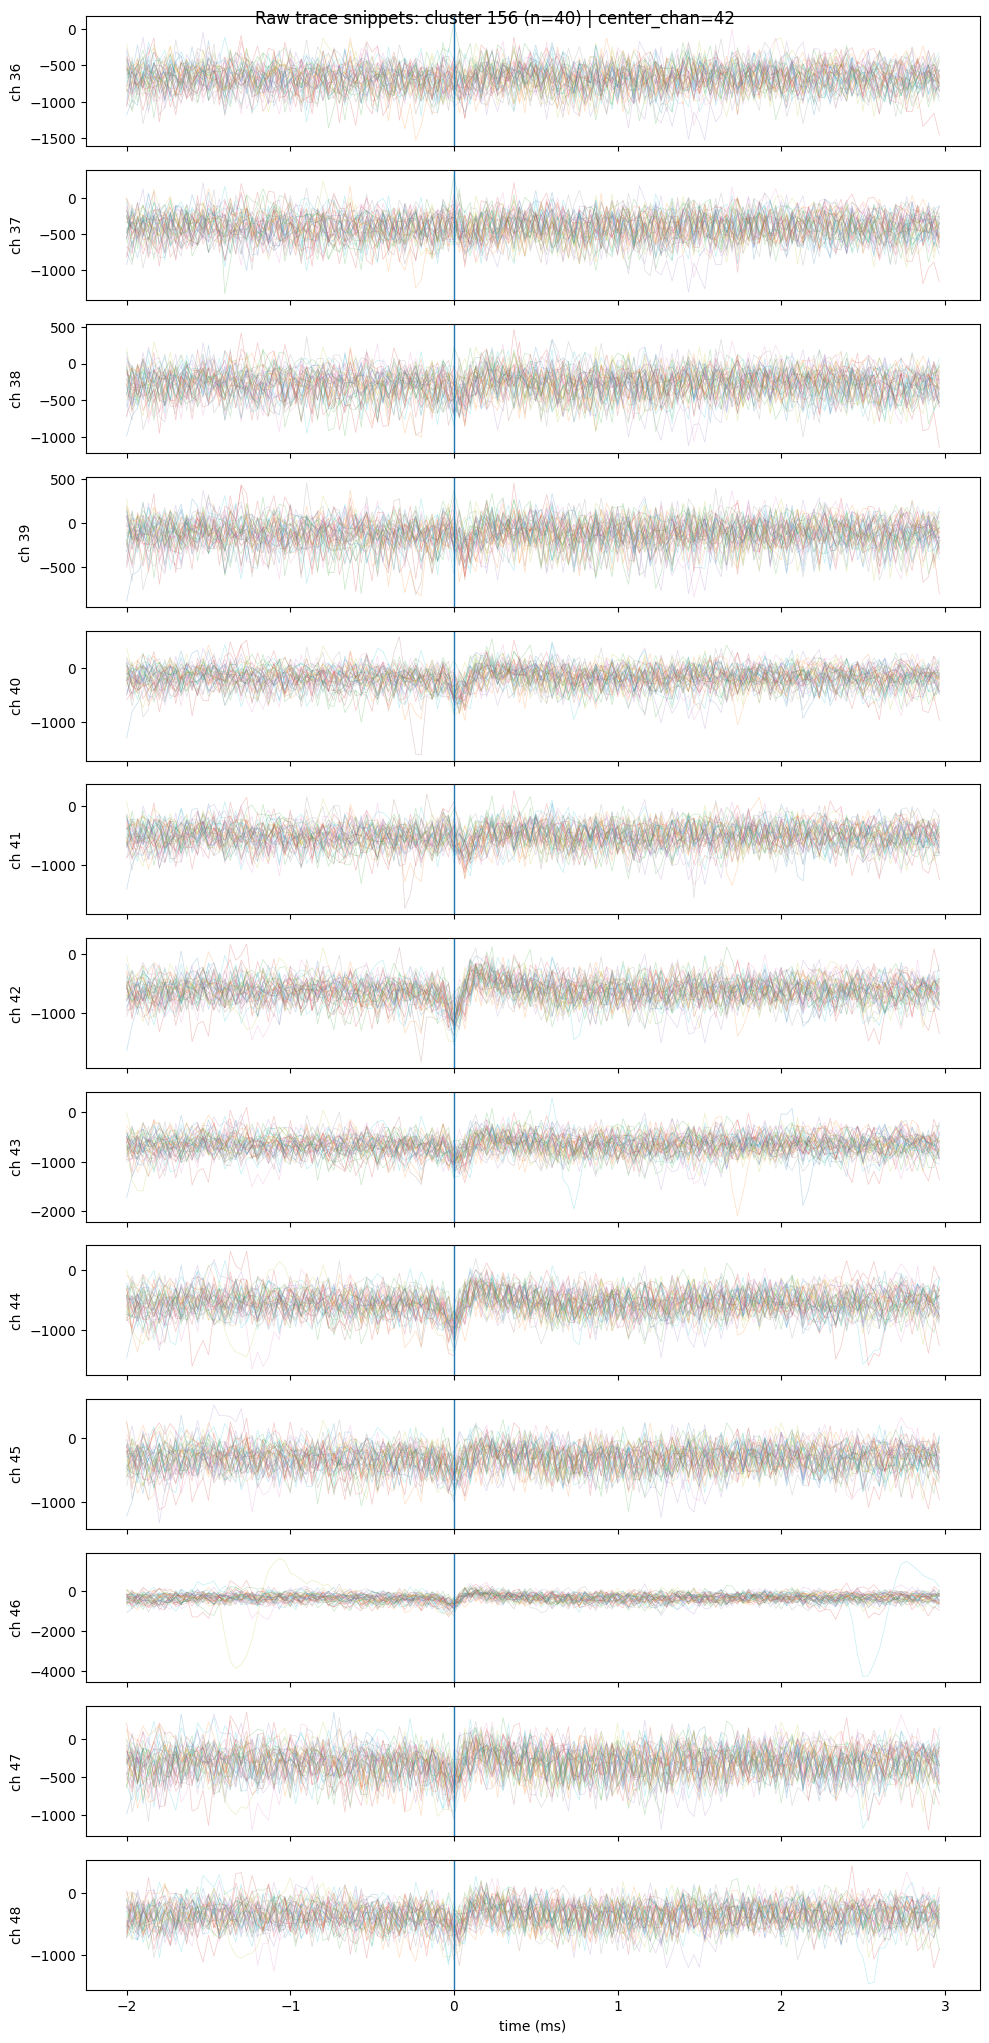

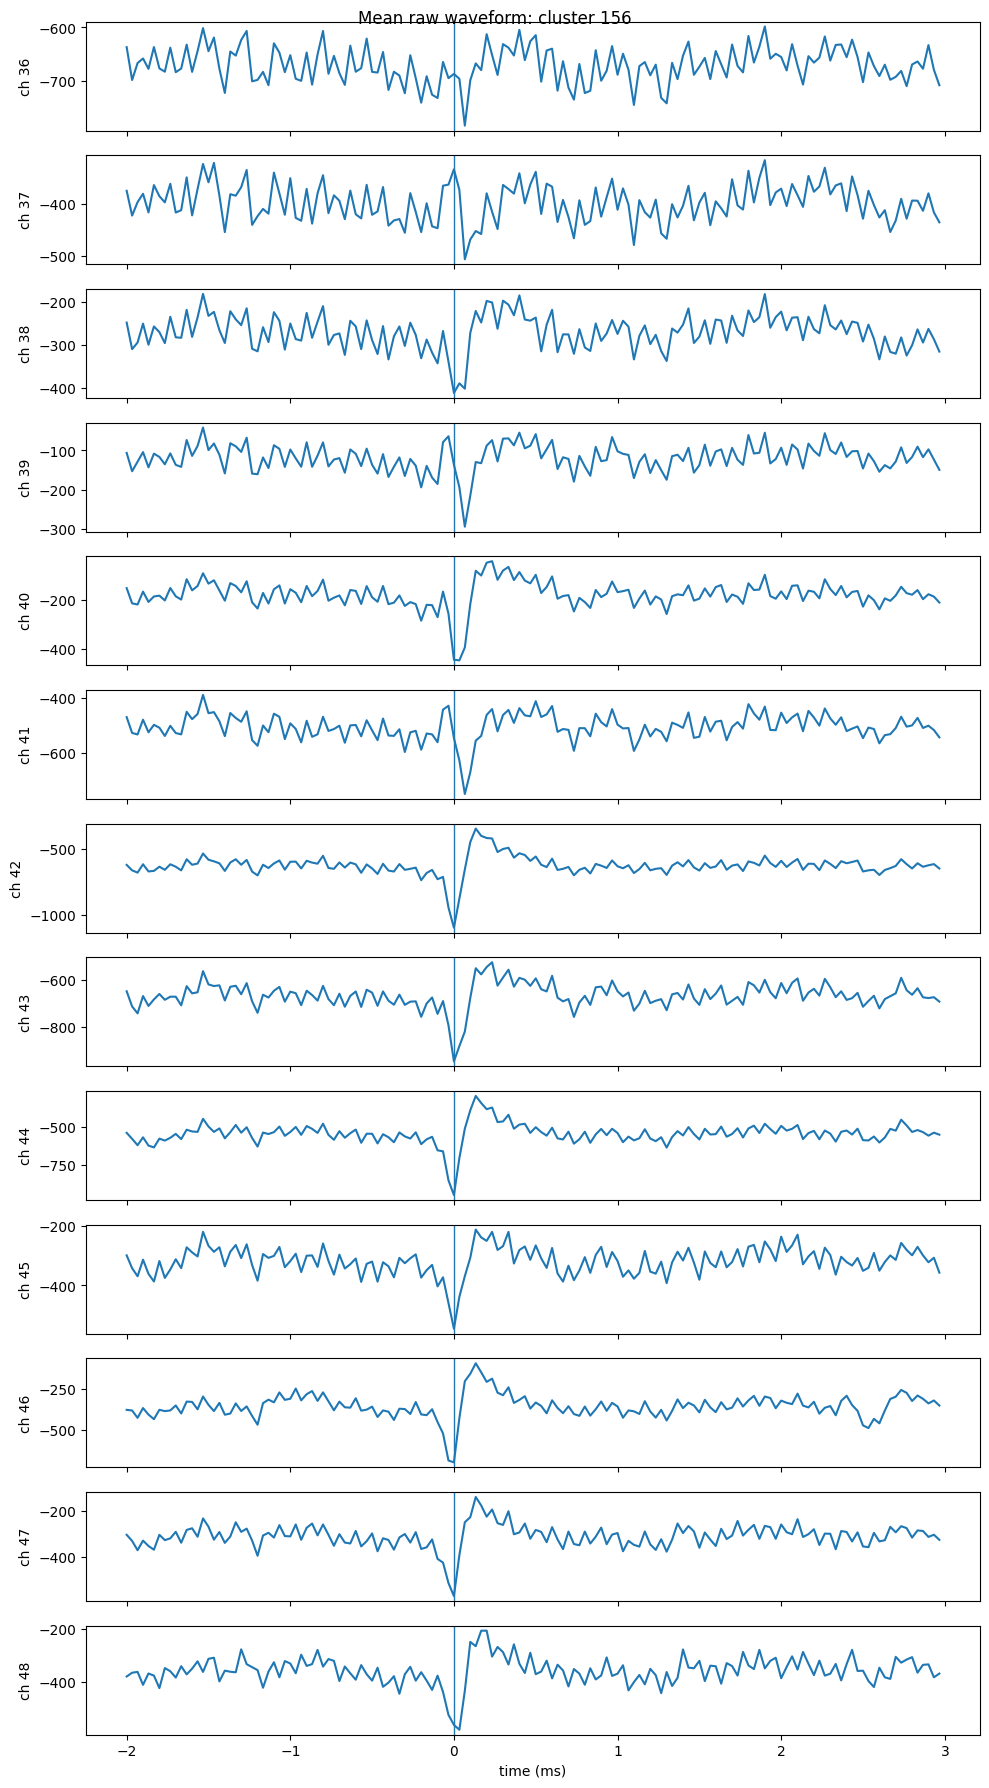

{'cluster_id': 156,
 'n_spikes_total': 15415,
 'n_spikes_plotted': 40,
 'center_chan': 42,
 'channels_shown': array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])}

In [18]:
N_CHANNELS = 384 # should be 384 for # of active channels change if needed

best_ch, dom_tpl = ks_best_channel_for_cluster(KS_FOLDER, cluster_id=cluster_id)
print("best_ch:", best_ch, "dominant_template:", dom_tpl)

out = plot_raw_traces_no_qm(
    ks_folder=KS_FOLDER,
    bin_path=BIN_PATH,
    cluster_id=cluster_id,
    n_channels=N_CHANNELS,
    fs=30000,
    center_chan=best_ch,
    neighbor_radius=6,
    n_spikes_to_plot=40,
    pre_ms=2.0,
    post_ms=3.0,
)
out


### Estimates peak channel to plot (ie. NOT using Kilosort templates)

estimated peak channel: 42


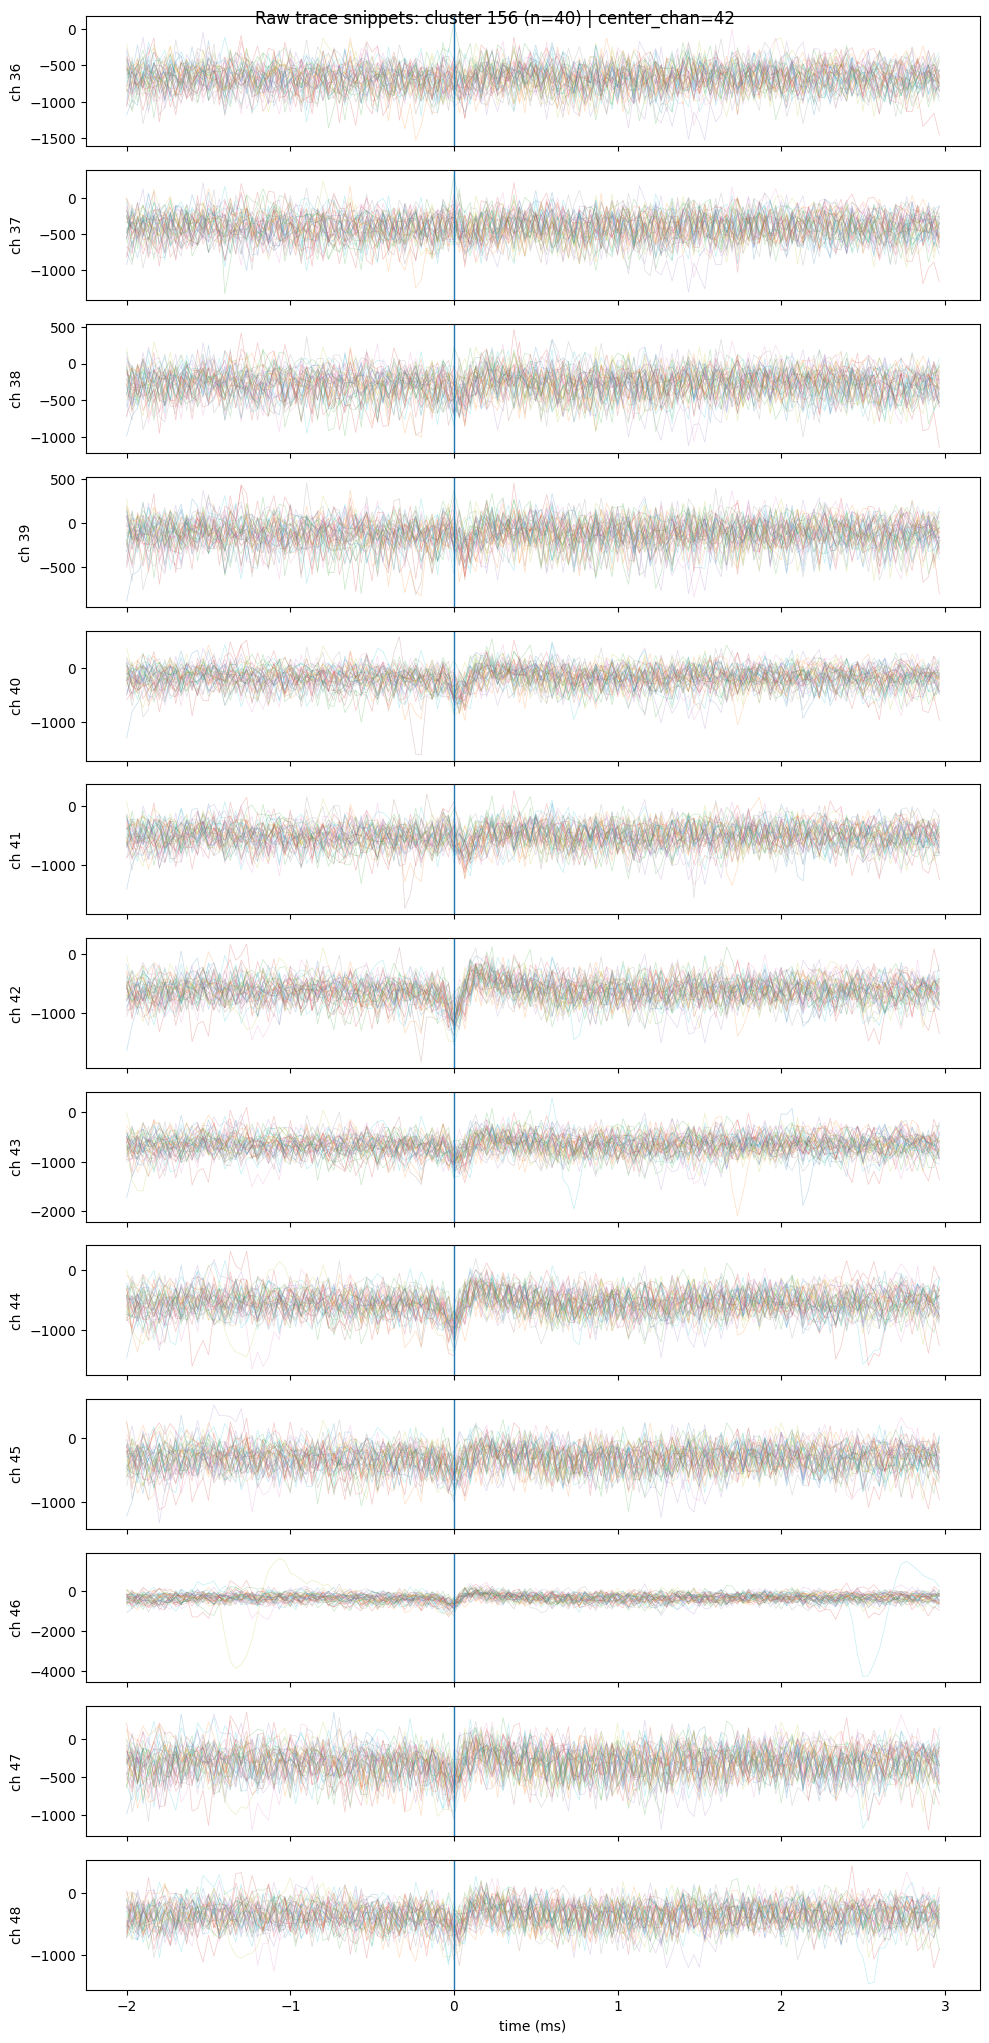

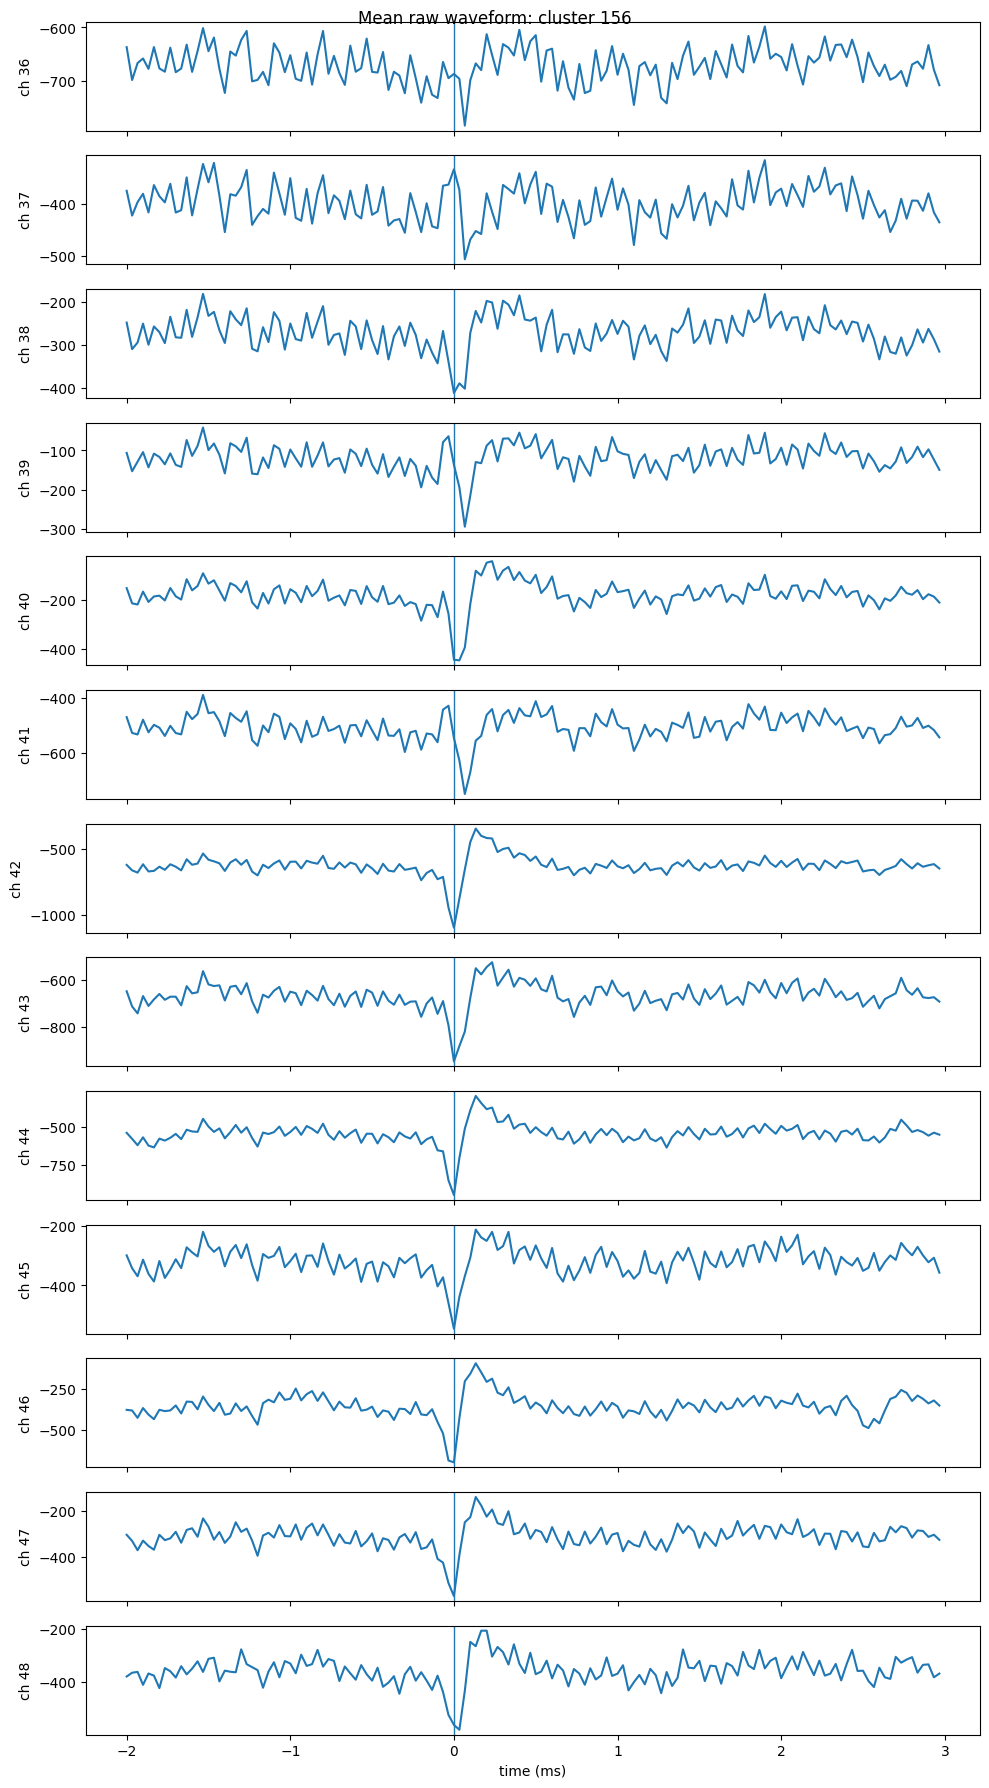

{'cluster_id': 156,
 'n_spikes_total': 15415,
 'n_spikes_plotted': 40,
 'center_chan': 42,
 'channels_shown': array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])}

In [19]:
N_CHANNELS = 384 # should be 384 for # of active channels change if needed


peak = estimate_peak_channel(KS_FOLDER, BIN_PATH, cluster_id, N_CHANNELS)
print("estimated peak channel:", peak)

out = plot_raw_traces_no_qm(
    ks_folder=KS_FOLDER,
    bin_path=BIN_PATH,
    cluster_id=cluster_id,
    n_channels=N_CHANNELS,
    center_chan=peak,
)
out
